## 도형그리기
- 각 함수들은 원본 이미지에 도형을 그린다.
- cv2.line(img, pt1, pt2, color, tickness=None, lineType=None, shift):img
    - 선그리기
    - 매개변수
        - img: 그릴 대상 이미지
        - pt1, pt2: 직선의 시작/끝점. 각각 튜플(x, y)
        - color: 선색 또는 밝기 (B,G,R) 튜플 또는 정수
        - thickness: 선 두께. 기본값=1 (픽셀)
        - lineType: 선 타입. cv2.LINE_4, cv2.LINE_8(기본값), cv2.LINE_AA(부드러운 형태) 중 선택. 일직선이 아니면 LINE_AA를 준다.
        - shift: 그리기 좌표값의 축소 비율. 기본값=0 일반적으로는 쓸일 없다.
    - 반환값
       - 선을 그린 image (ndarray) 반환 (모든 도형함수 동일)

- cv2.rectangle(img, pt1, pt2, color, thickness=None, lineType=None, shift=None):img
- cv2.rectangle(img, rec, color, thickness=None, lineType=None, shift=None):img
    - 사각형 그리기
    - 매개변수
        - pt1, pt2: 좌측상단(xmin,ymin), 우측하단(xmax,ymax) 좌표. 튜플 (x, y)
        - rec: 사각형의 위치정보(x, y, w, h) 튜플지정.(x,y) : **사각형 좌상단의 좌표**를 말한다.
        - thickness: 도형에서는 -1을 주면 내부를 채운다. 


- cv2.circle(img, center, radius, color, thickness=None, lineStyle=None, shift): img
    - 원 그리기. 원의 lineType은 LINE_AA (안티 알리애싱)을 주면 부드럽게 그려진다. 
    - 매개변수
        - center: 원의 중심좌표. 튜플 (x,y)
        - radius: 반지름

- CV2.polylines(img, pts, isClosed, color, thinkness=None, lineType=None, shift=None): img
    - 다각형을 그린다.
    - 매개변수
        - pts: 다각형의 외곽점들의 좌표배열. ndarray 리스트 (ex: \[np.array[[10,10],[50,50], [10,10]])\] => 리스트로 감싸서 넣는다.
        - isClosed: bool. 폐곡선 여부. 시작점과 끝점을 연결할지 여부.

- cv2.putText(img, text, org, fontFace, fontScale, color, thickness=None, lineType=None, bottomLeftOrigin=None): img
    - 문자열을 출력. 영문/숫자만 지원(한글 지원안함.)
    - 매개변수
        - text: 출력할 문자열
        - org: 이미지에서 문자열을 출력할 위치. 좌측 하단의 좌표를 튜플로 지정 (x,y)
        - fontFace: 폰트 종류. cv2.FONT_HERSHEY_ 로 시작하는 상수 중 선택
        - fontScale: 폰트 크기 확대/축소 비율. 1이 기본. 1을 기준으로 정한다.
        - bottomLeftOrigin: bool. True이면 지정한 출력위치의 바로위 (좌측상단)을 기준으로 출력함 ->**문자열이 뒤집히는 효과.**.. 거의 기본값 사용.

In [147]:
import cv2
import numpy as np

img = np.full(shape =(400,400,3), fill_value= 255, dtype = np.uint8)


# 직선
cv2.line(img, (50,50), (200,50), (0,0,255), 5) # (50,50): 시작 좌표() // (200,50): 끝좌표 // (0,0,255):선의 색(B,G,R)->Red // 5: 선두께
cv2.line(img, (50,50), (150,150), (0,255,0),5) # 두께생략 :1


# 사각형
cv2.rectangle(img, (50,200), # 좌상단(xmin,ymin)
             (300,350), # 우하단(xmax,ymax)
             (255,0,0),
             )

cv2.rectangle(img, (200,200,50,150), # (좌상단 x, 좌상단 y, width, height) 
             color= (0,255,0),
             thickness = -1)  # 두께 -1 : 사각형에 색을 채움~!


# 원
cv2.circle(img, (300,100), #center (x,y)
           30,#반지름
           (255,255,0), # color
           thickness = -1,# -1 색채움
           lineType = cv2.LINE_AA)  # 대각선이나ㅏ, 원일 경우 (직선이 아닐경우) cv2.LineAA 를 쓰면 좀더 부드럽게 처리됨

cv2.circle(img,(300,100),
          60,
          (255,0,0),
          8, lineType = cv2.LINE_AA)

# 다각형 
pts = np.array([[250,200],
                [300,200],
                [350,300],
                [250,300]
               ])

cv2.polylines(img,[pts], #연결할 좌표  -> 변수로 따로 지정했어도 넣을때는 무조건 리스트로 넣어줘야한다.~
              False, # 시작점과 끝점 연결 여부
              color = (255,0,0), # 선색깔
              thickness = 2 # 선두께
             )

# 텍스트
text = 'hello OpenCV'
#text = '안녕'  # open CV 제공 폰트들이 한글지원 안함 깨짐..-->쓰고 싶을때는 python pillow을 사용해서 ... 
cv2.putText(img,
           text, # 이미지에 그릴 글자들
           (50,300), # 글씨 출력할 위치
            cv2.FONT_HERSHEY_SIMPLEX,
           1, # FOnt Size(글씨크기),
           (100,100,100), # 색깔
           2, # 두께
           lineType = cv2.LINE_AA
           )





cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()



### 한글 출력 => Pillow 라이브러리를 이용
- openCV 는 한글을 지원하지 않아서 python라이브러리인 pillow를 사용해서 한글을 입력후 그것을 다시 openCV로 읽어서 작업한다.

In [76]:
# Malgun Gothic 폰트 경로 조회
import matplotlib as mpl
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths=None, fontext ='ttf')
print(len(font_list))
font_list[:5]

293


['C:\\Windows\\Fonts\\sylfaen.ttf',
 'C:\\Windows\\Fonts\\malgun.ttf',
 'C:\\WINDOWS\\Fonts\\pala.ttf',
 'C:\\Windows\\Fonts\\seguibli.ttf',
 'C:\\WINDOWS\\Fonts\\seguisbi.ttf']

In [78]:
malgun_list =[font for font in font_list if 'malgun' in font.lower()]
print(len(malgun_list))
malgun_list

6


['C:\\Windows\\Fonts\\malgun.ttf',
 'C:\\Windows\\Fonts\\malgunbd.ttf',
 'C:\\WINDOWS\\Fonts\\malgunsl.ttf',
 'C:\\Windows\\Fonts\\malgunsl.ttf',
 'C:\\WINDOWS\\Fonts\\malgun.ttf',
 'C:\\WINDOWS\\Fonts\\malgunbd.ttf']

In [81]:
font_path = 'C:\\Windows\\Fonts\\malgun.ttf' 

In [82]:
# !pip install Pillow  -->설치 

In [83]:
import numpy
from PIL import ImageFont, ImageDraw, Image
import cv2

In [149]:
img = np.full((400,400,3), fill_value= 255, dtype= np.uint8)  # 배경, 판

# 비어있는 판에 한글만 써넣고 그것을 원본으로 하여 openCV에서 사용하여 편집 하는 느낌이다.~!

# Pillow를 이용해서 이미지에 한글을 출력
# 폰트 설정

font = ImageFont.truetype(font_path, 20) # 폰트 경로, 폰트크기(기본 :10) --> 폰트를 세팅했다.. 
# ndarray(이미지)를 pillow image 형식으로 변환
img_pill = Image.fromarray(img) #ndarray 를 필로우의 이미지 타입으로 바꿔줌 // 필로우는 배열로 이미지 처리 안함.. 4교시 강의
draw = ImageDraw.Draw(img_pill) # Image에 글씨를 쓸수 있는 Draw형태로 변환 
draw.text((60,70), "안녕하세요 . ㅗ ",font = font, fill = (0,0,0)) # fill글씨색 -(R,G,B) 형태임 .. opencv에서할때 BGR 이니까 opencv로 읽을거라면 BGR이라고 생각하고 색 지정하기

# Pillow 이미지를 ndarray 변환 (openCV에서 사용해야되서.)
img = np.array(img_pill)  # --> 다시 배열로 바뀌면서  openCVㅇ에서의 오리지날 이미지가 됨

cv2.putText(img,'hello',(50,150), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0),lineType=cv2.LINE_AA)

cv2.imshow('img', img)  # OpenCV로 읽었기 때문에 위에pillow 사용해서 원본 이미지 만들때 글자 색 주의 해야함.. 
cv2.waitKey(0)
cv2.destroyAllWindows()

### Lenna Image에 텍스트 그리기

In [71]:
lenna = cv2.imread('./images/lenna.bmp')
lenna_txt = lenna.copy()

In [74]:
txt = 'Lenna Forsen'

cv2.putText(lenna_txt,
            txt,
            (50,450),
            cv2.FONT_HERSHEY_SIMPLEX,
           2,
           (255,255,255),
           3,
           cv2.LINE_AA,
           )


cv2.imshow('lenna',lenna)
cv2.imshow('lenna_txt', lenna_txt)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 이미지 Crop
- open cv는 이미지를 numpy의 ndarray를 이용해 연산하기 때문에 image의 특정 영역의 좌표만 알면 그 영역을 잘라낼 수 있다.

In [90]:
lenna = cv2.imread('./images/lenna.bmp')
lenna.shape

(512, 512, 3)

In [94]:
height_s = int(lenna.shape[0]/4)  # 시작 height
height_e = height_s *3            # 끝 height
width_s = int(lenna.shape[1]/4)   #  width 시작
width_e = width_s *3              # width 끝   =----> 각각 높이 너비의 1/4,3/4 지점을 찾아서 4개의 지점을 찾았다.
print(height_s,height_e)

128 384


In [95]:
cropped_lenna = lenna[height_s:height_e, width_s:width_e]  # lenna 이미지는 ndarray로 되어있어서 슬라이싱을 통해서 잘라낸다.

In [101]:
cv2.imshow('src', lenna)
cv2.imshow('cropped_lenna', cropped_lenna)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 영상의 기하학적 변환
- 영상을 구성하는 픽셀의 배치 구조를 변경함으로써 전체 영상의 모양을 바꾸는 작업

### 이동 변환 (Translation Transformation) 5/6  5교시
- 가로 또는 세로 방향으로 영상을 이동시키는 변환
- X축과 Y축 방향으로 이동 변위를 지정
- 그림을 가로(X축) 으로 a 만큼 , 세로(Y축)으로 b만큼 이동할 경우
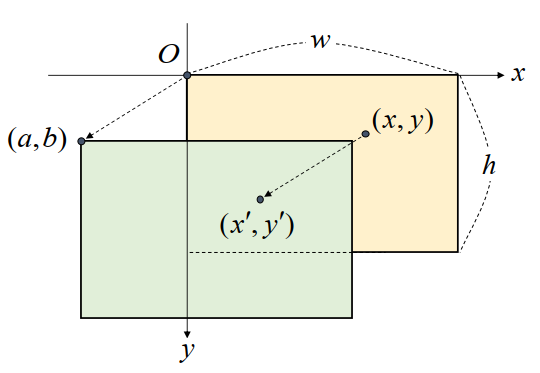

$$
\,각\,좌표들을 (a,b)\,만큼\,더한다.
\large{
    \begin{cases}
    x'=x+a\\
    y'= y+b
    \end{cases}
}
$$

<hr>
$$
행렬곱으로\,표현\\
\large{
    \begin{bmatrix}
    x'\\
    y'
    \end{bmatrix}=
    \begin{bmatrix}
    1 & 0 & a \\
    0 & 1 & b
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
    x\\y\\1
    \end{bmatrix}
}\\
이동을 위한 2\times3\,어파인\,변환\,행렬 \\
\begin{bmatrix}
1 & 0 & a \\
0 & 1 & b
\end{bmatrix}
$$

- 어파인 곱하고 더하는것 -->ex)wx+b

- cv2.warpAffine(src, M, dsize, dst=None, flags=None, borderMode=None, borderValue=None)
    - 매개변수
        - src: 원본 영상
        - M: $2\times3$ 어파인 변환 행렬. 실수형
        - dsize: 결과 영상의 크기를 (w, h) 튜플로 지정. (0,0) 이면 같은 크기
        - flags: 보간법 --> resize 할때 비어있는 픽셀에 채울 값을 지정.. 
        - borderModel: 영상이 이동해서 생기는 빈공간을 채우는 방식. default: cv2.BORDER_CONSTANT (검정색으로 채운다.)
            - borderValue: cv2.BORDER_CONSTANT 일때 채울 색. 0: 검정, 1: 흰색

In [151]:
import cv2
import numpy as np

lenna = cv2.imread('./images/Lenna.bmp')

a,b = 100, 200 # a : 가로 이동 범위 , b : 세로 이동 범위 // 프레임은 바뀌는게 아니라서.. 

# affine 변환 행령(2 *3) - 실수형으로 만들어 줘야함 
aff_matrix = np.array([[1,0,a],
                       [0,1,b]], dtype = np.float32)

img = cv2.warpAffine(lenna, aff_matrix, (0,0))#dsize= (0,0) 원본의 프레임사이즈 그대로 유지// 원본 프레임은 그대로 있고 이미지만 움직이는 것이다.
#img = cv2.warpAffine(lenna, aff_matrix, (1024,1024)) # 이미지를 유지 하면서 이동
img = cv2.warpAffine(lenna, aff_matrix, (0,0), borderMode = cv2.BORDER_REFLECT101)
#img = cv2.warpAffine(lenna, aff_matrix, (0,0), borderMode = cv2.BORDER_CONSTANT, borderValue= 0)
# cv2.BORDER_CONSTANT 로 지정했을때만 borderValue 를 지정할 수 잇음
# cv2.BORDER_REFLECT101 로 지정했을때는 그냥 두면됨
 

cv2.imshow('src', lenna)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 전단 변환(Shear transformation)
- 직사각형 형태의 영상을 한쪽 방향으로 밀어서 평행사변형 모양으로 변형되는 변환으로 층밀림 변환이라고도 한다.
    - 한축 방향으로 이동하는데 기준축에 비례해서 다르게 이동한다.
- X축과 Y축에 대해 따로 정의 한다.
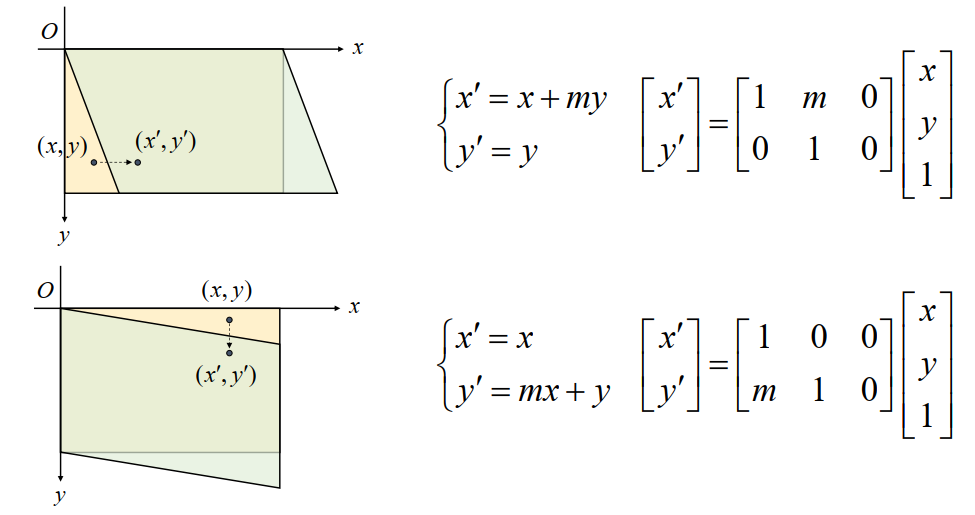
<center>m: 비율</center>

In [154]:
lenna = cv2.imread('./images/lenna.bmp')

m = 0.3  # rate가 커질수록 더많이 찌그러 진다. 
aff_matrix= np.array([[1,m,0],  # x 값변화
                      [0,1,0]])

aff_matrix2= np.array([[1,0,0],
                      [m,1,0]])  # y 값변화

img = cv2.warpAffine(lenna, aff_matrix, (0,0))
img1 = cv2.warpAffine(lenna, aff_matrix2, (0,0))
w, h = lenna.shape[1], lenna.shape[0]
# img = cv2.warpAffine(lenna, aff_matrix, (w+int(h*m),h)) # h는 안바뀌니까 그대로 0
# img1 = cv2.warpAffine(lenna, aff_matrix2, (w,h+int(w*m)))

cv2.imshow('src',lenna)
cv2.imshow('img', img)
cv2.imshow('img1', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 크기 조절(확대/축소 - Resize)
- cv2.resize(src, dsize\[, fx, fy, interpolation\])
    - 매개변수
        - src: 원본 이미지 
        - dsize: 조절할 이미지 크기 (width, height)
        - fx, fy: 상대적 크기로 지정한다. (dsize는 0,0 으로 설정한다. dsize를 설정하면 dsize가 우선한다.)
        - interpolation: 보간 방법
             - 크기를 조절할 때 본래는 없는 값을 메우는 작업이 필요한데, 이를 interpolation(보간법)이라고 한다.
    - 반환값
        - ndarray: resize된 이미지반환
        
### Interpolation 상수
- cv2.INTER_NEAREST: 이웃보간법. nearest neighbor interpolation이라고도 하며, 주변 이웃 pixel값을 가져와 빈공간을 채운다. 가장 빠르지만 화질이 좋지 않다.  --> 잘안씀 성능이 너무 안좋음...
- cv2.INTER_LINEAR: 쌍 선형보간법.(2x2 이웃픽셀을 계산해서 만든다.) resize의 default 방식. 연산속도가 빠르고 화질도 좋아서 많이 사용된다.
- cv2.INTER_CUBIC - 바이큐빅 보간법.(4x4 이웃픽셀을 계산해서 만든다.)  INTER_LINEAR보다 화질이 좋고 lancozs보다 계산량이 적어 많이 사용된다.
- cv2.INTER_LANCZOS4 - Lanczos보간법.(8x8 이웃픽셀을 계산해서 만든다.) 가장 부드럽게 값을 메우지만 연산이 많이 필요하다.
- cv2.INTER_AREA: 영역보간법. 크기를 **축소**할 때 많이 사용한다. 확대할 때는 nearest neighbor와 유사하다.
- 일반적으로 **쌍 선형보간법을 많이 쓴다.**
    - 이미지 확대: 바이큐빅, 쌍 선형 보간법을 가장 많이 사용
    - 이미지 축소: 영역 보간법을 많이 사용.
    
#### - LINEAR -> CUBIC -> LANCZO 순으로 성능이 좋고 // 속도는 느려진다. 
### Interpolation 비교
- **upsampling**  사이즈 키움
    - nearest와 area는 계단현상이 발생
    - linear는 edge가 smooth된 효과가 발생
    - cubic과 lancozs는 edge가 shapen되는 효과
- **downsampling** 사이즈 줄임 
    - area는 pixel 관계에 따라 resampling하기 때문에 상대적으로 부드럽게 변환된다.
    - 나머지는 계단현상이 많이 발생한다.

In [125]:
rose = cv2.imread('./images/rose.bmp')
rose.shape

(320, 480, 3)

In [131]:
# dsize: 조절할 이미지 크기 (width, height) 사용 --> 사이즈를 얼마나 늘릴지 명시적으로 직접 지정

rose_small = cv2.resize(rose, (240,160), interpolation=cv2.INTER_AREA) # width,heigt
rose_big = cv2.resize(rose, (960,640), interpolation= cv2.INTER_NEAREST)  # 성능이 너무 안좋아서 안쯤... 
rose_big2 = cv2.resize(rose, (960,640), interpolation= cv2.INTER_LINEAR)  # 차라리 속도가 중요하면 이걸 사용하는게.. 
rose_big3 = cv2.resize(rose, (960,640), interpolation= cv2.INTER_CUBIC)
rose_big4 = cv2.resize(rose, (960,640), interpolation= cv2.INTER_LANCZOS4)  # 속도는 느리지만 성능이 제일 좋다.. 
                        
                        
cv2.imshow('src', rose)
# cv2.imshow('small',rose_small)
cv2.imshow('big_nearest',rose_big)
cv2.imshow('big2_linear',rose_big2)
cv2.imshow('big3_CUBIC',rose_big3)
cv2.imshow('big4_LANCZO',rose_big4)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [134]:
rose_resize1 = cv2.resize(rose, (0,0), fx = 0.5, fy = 0.5, interpolation = cv2.INTER_AREA) #비율로 크기를 지정~~!  / 반으로 줄임
rose_resize2 = cv2.resize(rose, (0,0), fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC) # 3배로 키움 --> 비율도 마음대로 가능하지만 보통 비율같게 한다.

cv2.imshow('resize1', rose_resize1)
cv2.imshow('resize2',rose_resize2)
cv2.waitKey(0)
cv2.destroyAllWindows()


### 대칭변환(Flip)
- cv2.flip(src, flipCode)
- 매개변수
    - src: 원본소스
    - flipCode: 대칭방향지정
        - 양수: 좌우대칭
        - 0: 상하대칭
        - 음수: 좌우/상하 대칭


In [155]:
img1 = cv2.flip(rose, 1) # 양수 - 좌우대칭
img2 = cv2.flip(rose, 0)
img3 = cv2.flip(rose, -1)


cv2.imshow('src', rose)
cv2.imshow('img1', img1) #좌우
cv2.imshow('img2', img2) # 상하
cv2.imshow('img3', img3) # 좌우상하 대칭

cv2.waitKey(0)
cv2.destroyAllWindows()

## 회전(Rotate)
- cv.rotate(src, rotateCode): img  --> 90도 단위로 회전할때 
    - 매개변수
        - src: 회전시킬 원본이미지
        - rotateCode: 회전각도 상수
            - ROTATE_90_CLOCKWISE: 시계방향 90도
            - ROTATE_180: 180도 회전
            - ROTATE_90_COUNTERCLOCKWISE: 반시계방향 90도(시계방향 270도)
#### 원하는 각도만큼 회전 하고 싶을때 
- 얼마나 회전할지 getRotationMatrix2D()를 이용해 어파인 변환 행렬을 생성.
- warpAffine()을 이용해 회전 처리
- getRotationMatrix2D(center, angle, scale)
    - 2x3 회전을 위한 어파인 변환 행렬 생성
    - center: 회전의 중심점 좌표, 튜플형태로 지정
    - angle: 중심점을 기준으로 회전할 각도
    - scale: 이미지 확대 및 축소 비율
- warpAffine(src, M, dsize)
    - 회전 처리
    - src: 회전시킬 대상 이미지 배열.
    - M:  getRotationMatrix2D()가 반환한 어파인 변환 행렬을 사용
    - dsize: 출력이미지 크기        

In [137]:
# rotate()

lenna = cv2.imread('./images/lenna.bmp')


In [138]:
lenna_90 = cv2.rotate(lenna, cv2.ROTATE_90_CLOCKWISE)
lenna_180 = cv2.rotate(lenna, cv2.ROTATE_180) # 시계방향 180
lenna_270 = cv2.rotate(lenna, cv2.ROTATE_90_COUNTERCLOCKWISE) # 시계방향 270도 // 반시계 90도


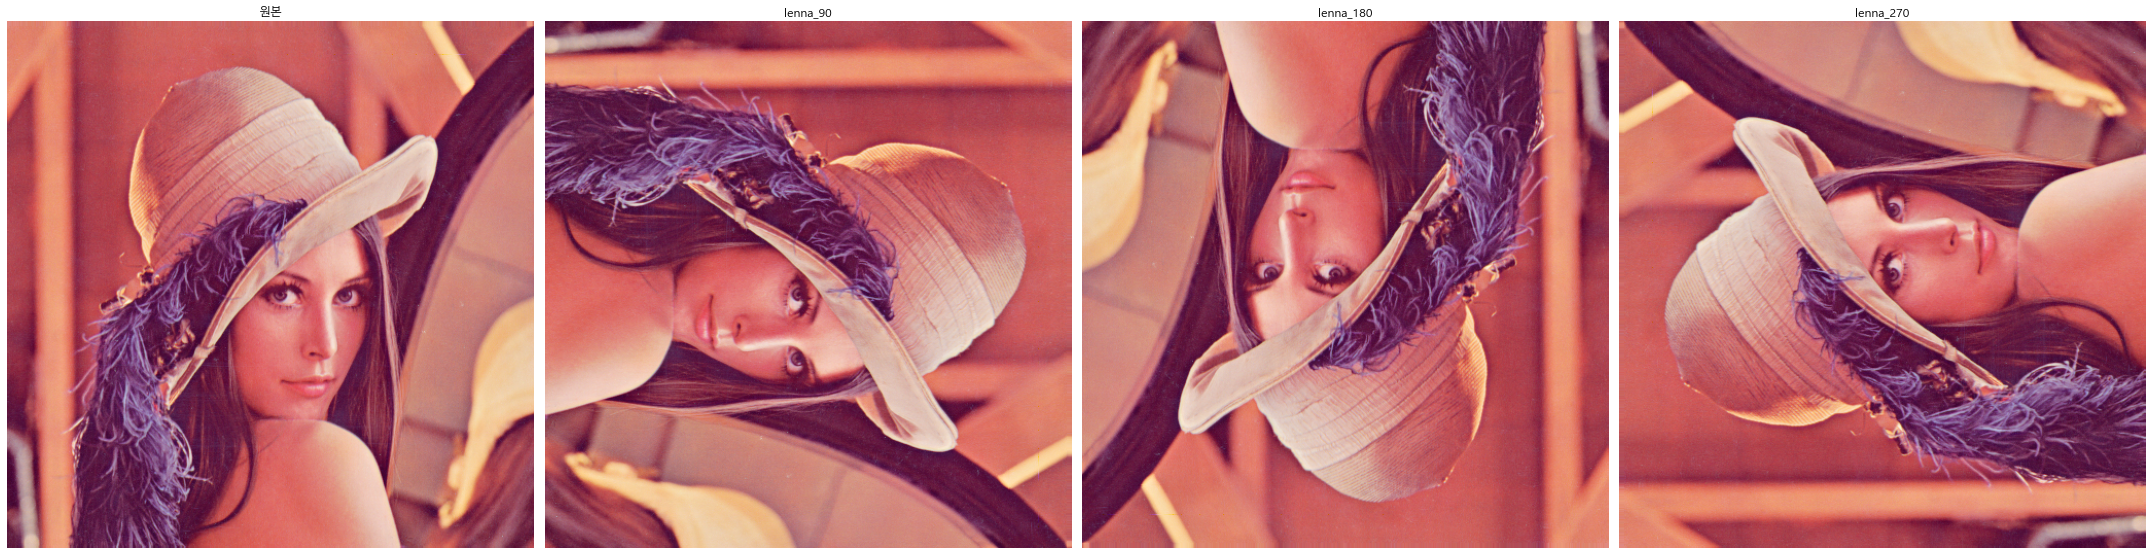

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
row, col = 1,4

plt.subplot(row, col, 1)
plt.imshow(lenna[:,:,::-1])
plt.title('원본')
plt.axis('off')

plt.subplot(row, col, 2)
plt.imshow(lenna_90[:,:,::-1])
plt.title('lenna_90')
plt.axis('off')

plt.subplot(row, col, 3)
plt.imshow(lenna_180[:,:,::-1])
plt.title('lenna_180')
plt.axis('off')

plt.subplot(row, col, 4)
plt.imshow(lenna_270[:,:,::-1])
plt.title('lenna_270')
plt.axis('off')

plt.tight_layout()
plt.show()

### 원하는 각도 만큼 회전 - 각도 : 양수 -> 시계 반대방향,,  음수->시계방향

In [143]:
center_x, center_y = int(lenna.shape[1]/2), int(lenna.shape[0]/2)  # 좌표는 웬만하면  int값으로 줘~~!
print(center_x, center_y)

256 256


In [144]:
angle = 45 # 반시계 45도 -->

# 회전에 사용할 affine 변환 행렬 생성--> 회전된 배열을 반환해준다.
rot_m = cv2.getRotationMatrix2D((center_x,center_y), # 회전중심축 좌표
                                angle, # 회전각도--> 양수로 입력하면 시가반대 방향,, 음수 시계방향 으로 회전한다.
                                1)
print(rot_m)

[[   0.70710678    0.70710678 -106.03867197]
 [  -0.70710678    0.70710678  256.        ]]


In [145]:
lenna_45 = cv2.warpAffine(lenna, rot_m, (0,0))

cv2.imshow('lenna_45',lenna_45)
cv2.waitKey(0)
cv2.destroyAllWindows()
